# Image generation app ✨

In [1]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os #Provides a way of using operating system-dependent functionality
import io ## Provides core tools for working with streams of data
import IPython.display 
from IPython.display import Image, display, HTML  # Used for displaying rich content (e.g., images, HTML) in Jupyter Notebooks
from PIL import Image # Python Imaging Library for opening, manipulating, and saving image files
import base64  # Encodes and decodes data in base64 format

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']
#print(hf_api_key)

To set up the HF_API_TTI_BASE for the text-to-image endpoint, you should choose a model from text-to-image section that is available on the Hugging Face website's. In the Hugging platform, it was suggested to use the model stable-diffusion-v1-5 (https://huggingface.co/stablediffusionapi/my-stablediffusion-lora-4674). However, nowdays this model does seem decraptated. Therefore, for the below it has been used  "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"

In [2]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
ENDPOINT_URL=os.environ['HF_API_TTI_BASE']
#print(ENDPOINT_URL)

# Helper function
import requests, json

#Text-to-image endpoint
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

prompt = "a dog in a park"
result = get_completion(prompt)
IPython.display.HTML(f'<img src="data:image/png;base64,{result}" />')    

The original snippet code has been changed since the output was showing an error UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte".
The issue might arise because of the response from the API is likely binary image data, not JSON-encoded data. Therefore,  an option to solve this issue could be to decode the response content as UTF-8 and parse it as JSON results in a UnicodeDecodeError. 
To sum up, the code has been fixed, in the followng way: firstly check the response's Content-Type to confirm if it's returning binary data (like a PNG or JPEG). If it's binary data, you can directly handle it as an image (e.g., using base64 to embed it in HTML).


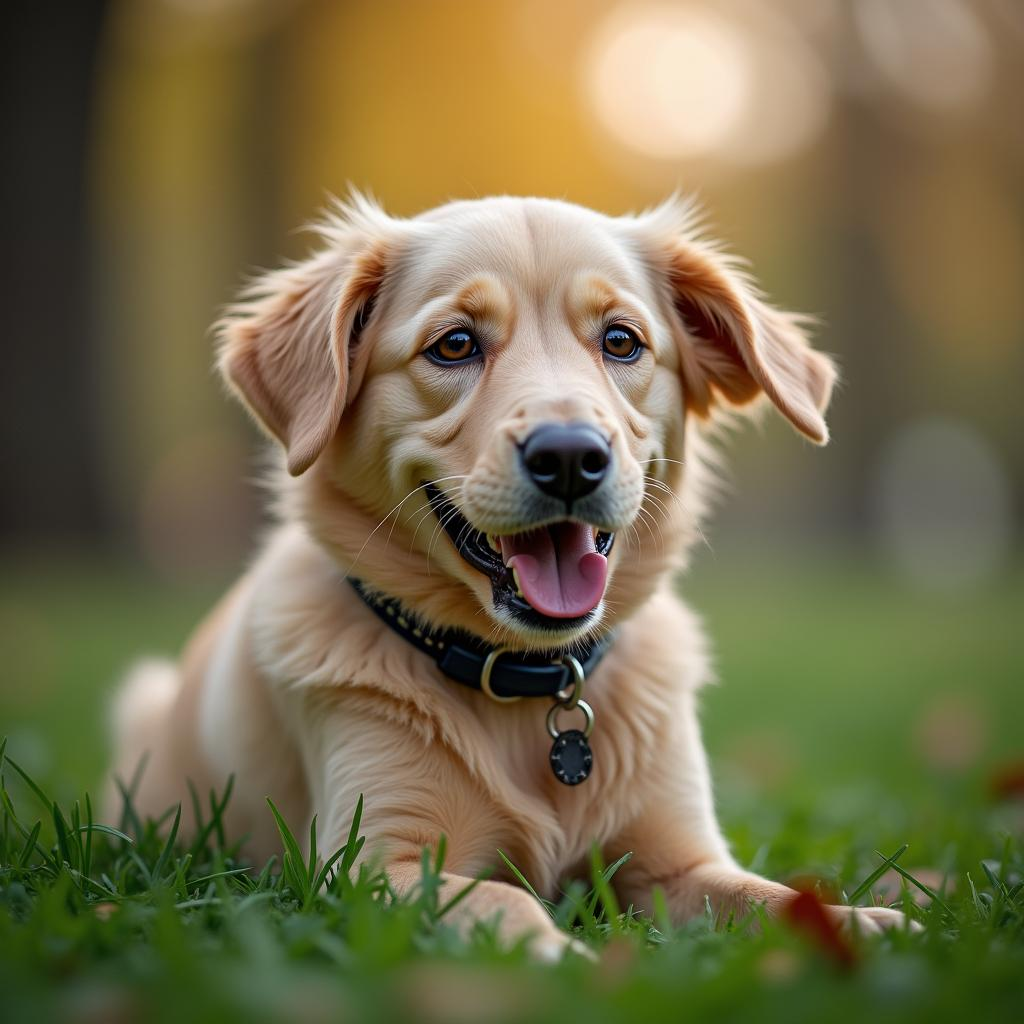

In [3]:
#EXAMPLE1
import os
import requests
import json
import base64
from IPython.display import HTML

# Helper function
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
        "Authorization": f"Bearer {os.environ['HF_API_KEY']}",  # Ensure the env var is set correctly
        "Content-Type": "application/json",
    }
    data = {"inputs": inputs}
    if parameters is not None:
        data.update({"parameters": parameters})
    
    response = requests.post(ENDPOINT_URL, headers=headers, data=json.dumps(data))
    
    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code} - {response.text}")
    
    # If the response is binary image data
    return response.content

# Example prompt
prompt = "a dog in a park"

# Fetch the result
result = get_completion(prompt)

# Encode the binary image to base64 for HTML display
image_base64 = base64.b64encode(result).decode("utf-8")

# Display the image in an IPython notebook
HTML(f'<img src="data:image/png;base64,{image_base64}" />')


In [4]:
#EXAMPLE2
import os
import requests
import json
import base64
from IPython.display import HTML

# Helper function
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
        "Authorization": f"Bearer {os.environ['HF_API_KEY']}",  # Ensure the env var is set correctly
        "Content-Type": "application/json",
    }
    data = {"inputs": inputs}
    if parameters is not None:
        data.update({"parameters": parameters})
    
    response = requests.post(ENDPOINT_URL, headers=headers, data=json.dumps(data))
    
    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code} - {response.text}")
    
    # If the response is binary image data
    return response.content

# Example prompt
prompt = "an astronaut in a park"

# Fetch the result
result = get_completion(prompt)

# Encode the binary image to base64 for HTML display
image_base64 = base64.b64encode(result).decode("utf-8")

# Display the image in an IPython notebook
HTML(f'<img src="data:image/png;base64,{image_base64}" />')

Exception: Request failed: 500 - {"error": "Model too busy, unable to get response in less than 240 second(s)"}

## Building an image generation app 

Here we are going to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library.In the Hugging platform, it was suggested to run `runwayml/stable-diffusion-v1-5` using the `🧨 diffusers` library. However, nowdays this model does seem decraptated. Therefore, for the purpose to build up an image generation app it has been selected  `black-forest-labs'. For more info  "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"

## Generating with `gr.Interface()`

In [5]:
# Get port1 from the environment
PORT1 = int(os.environ.get('PORT1', 7860))

In [ ]:
#import gradio as gr 

#A helper function to convert the PIL image to base64
#so you can send it to the API
#def base64_to_pil(img_base64):
    #base64_decoded = base64.b64decode(img_base64)
    #byte_stream = io.BytesIO(base64_decoded)
    #pil_image = Image.open(byte_stream)
    #return pil_image

#def generate(prompt):
    #output = get_completion(prompt)
    #result_image = base64_to_pil(output)
    #return result_image

#gr.close_all()
#demo = gr.Interface(fn=generate,
                    #inputs=[gr.Textbox(label="Your prompt")],
                    #outputs=[gr.Image(label="Result")],
                    #title="Image Generation with Stable Diffusion",
                    #description="Generate any image with Stable Diffusion",
                    #allow_flagging="never",
                    #examples=["the spirit of a tamagotchi wandering in the city of #Vienna","a mecha robot in a favela"])

#demo.launch(share=True, server_port=int(os.environ['PORT1']))

The above code does not seem run properly. Therefore, following suggestion chatgpt a  a corrected and improved version of the snippet code will be used. The changes include fixing the base64_to_pil function, adjusting the generate function to handle binary image data or base64 JSON responses, and ensuring proper usage of Gradio.

In [6]:
%pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 73.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gradio as gr
import base64
import io
import os
from PIL import Image
import requests

# A helper function to convert binary or base64 data to a PIL image
def base64_to_pil(img_data):
    if isinstance(img_data, bytes):  # Handle raw binary data
        byte_stream = io.BytesIO(img_data)
    else:  # Handle base64-encoded string
        base64_decoded = base64.b64decode(img_data)
        byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

# A helper function to send a prompt to the API and receive an image
def get_completion(inputs, parameters=None, ENDPOINT_URL=os.environ['HF_API_TTI_BASE']):
    headers = {
        "Authorization": f"Bearer {os.environ['HF_API_KEY']}",  # Ensure the env var is set
        "Content-Type": "application/json",
    }
    data = {"inputs": inputs}
    if parameters is not None:
        data.update({"parameters": parameters})
    
    response = requests.post(ENDPOINT_URL, headers=headers, json=data)
    
    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code} - {response.text}")
    
    # If the response is binary image data or contains base64 JSON
    content_type = response.headers.get("Content-Type", "")
    if "application/json" in content_type:  # Response is JSON with base64
        return response.json()["image"]  # Adjust the key based on your API response
    elif "image" in content_type:  # Response is raw image binary
        return response.content
    else:
        raise ValueError("Unexpected response content type")

# Gradio interface function
def generate(prompt):
    output = get_completion(prompt)
    result_image = base64_to_pil(output)
    return result_image

# Ensure all Gradio interfaces are closed before launching a new one
gr.close_all()

# Create the Gradio interface
demo = gr.Interface(
    fn=generate,
    inputs=[gr.Textbox(label="Your prompt")],
    outputs=[gr.Image(label="Result")],
    title="Image Generation with Stable Diffusion",
    description="Generate any image with Stable Diffusion.",
    allow_flagging="never",
    examples=[
        ["a dog in a park"],
        ["Astronaut riding a horse"]
    ]
)

# Launch the Gradio app
demo.launch(share=True, server_port=int(os.environ.get('PORT1', 7860)))


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://db0bf173d733096880.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
demo.close()

Closing server running on port: 7860


## Building a more advanced interface

In [3]:
import gradio as gr 

#A helper function to convert the PIL image to base64 
# so you can send it to the API
def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def generate(prompt, negative_prompt, steps, guidance, width, height):
    params = {
        "negative_prompt": negative_prompt,
        "num_inference_steps": steps,
        "guidance_scale": guidance,
        "width": width,
        "height": height
    }
    
    output = get_completion(prompt, params)
    pil_image = base64_to_pil(output)
    return pil_image

#### gr.Slider()
- You can set the `minimum`, `maximum`, and starting `value` for a `gr.Slider()`.
- If you want the slider to increment by integer values, you can set `step=1`.

from here 


In [4]:
# Get port2 from the environment
PORT2 = int(os.environ.get('PORT2', 7870))

In [5]:
gr.close_all()
demo = gr.Interface(fn=generate,
                    inputs=[
                        gr.Textbox(label="Your prompt"),
                        gr.Textbox(label="Negative prompt"),
                        gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                                 info="In how many steps will the denoiser denoise the image?"),
                        gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7, 
                                  info="Controls how much the text prompt influences the result"),
                        gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512),
                        gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512),
                    ],
                    outputs=[gr.Image(label="Result")],
                    title="Image Generation with Stable Diffusion",
                    description="Generate any image with Stable Diffusion",
                    allow_flagging="never"
                    )

demo.launch(share=True, server_port=int(os.environ['PORT2']))

Closing server running on port: 7860


/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7870
* Running on public URL: https://5f1f1a51da01eaa9ff.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/blocks.py", line 2047, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/python/3.12.1/lib/python3.12/site-packages/gradio/blocks.py", line 1594, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/anyio/to_thread.py", line 56, in run_sync
    return a

In [6]:
demo.close()

Closing server running on port: 7870


## `gr.Blocks()`

- Within `gr.Blocks()`, you can define multiple `gr.Row()`s, or multiple `gr.Column()`s.
- Note that if the jupyter notebook is very narrow, the layout may change to better display the objects.  If you define two columns but don't see the two columns in the app, try expanding the width of your web browser, and the screen containing this jupyter notebook.

- When using `gr.Blocks()`, you'll need to explicitly define the "Submit" button using `gr.Button()`, whereas the 'Clear' and 'Submit' buttons are automatically added when using `gr.Interface()`.

In [7]:
# Get port3 from the environment
PORT3 = int(os.environ.get('PORT3', 7880))

In [8]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    prompt = gr.Textbox(label="Your prompt")
    with gr.Row():
        with gr.Column():
            negative_prompt = gr.Textbox(label="Negative prompt")
            steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
            guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
            width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
            height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
            btn = gr.Button("Submit")
        with gr.Column():
            output = gr.Image(label="Result")

    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])
gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

Closing server running on port: 7870
Closing server running on port: 7860
* Running on local URL:  http://127.0.0.1:7880
* Running on public URL: https://bf578dc1cf92094d3f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [9]:
demo.close()

Closing server running on port: 7880


#### scale

- To choose how much relative width to give to each column, set the `scale` parameter of each `gr.Column()`.  
- If one column has `scale=4` and the second column has `scale=1`, then the first column takes up 4/5 of the total width, and the second column takes up 1/5 of the total width.

#### gr.Accordion()
- The `gr.Accordion()` can show/hide  the app options with a mouse click.
- Set `open=True` to show the contents of the Accordion by default, or `False` to hide it by default.

In [10]:
# Get port4 from the environment
PORT4 = int(os.environ.get('PORT4', 7890))

In [11]:
with gr.Blocks() as demo:
    gr.Markdown("# Image Generation with Stable Diffusion")
    with gr.Row():
        with gr.Column(scale=4):
            prompt = gr.Textbox(label="Your prompt") #Give prompt some real estate
        with gr.Column(scale=1, min_width=50):
            btn = gr.Button("Submit") #Submit button side by side!
    with gr.Accordion("Advanced options", open=False): #Let's hide the advanced options!
            negative_prompt = gr.Textbox(label="Negative prompt")
            with gr.Row():
                with gr.Column():
                    steps = gr.Slider(label="Inference Steps", minimum=1, maximum=100, value=25,
                      info="In many steps will the denoiser denoise the image?")
                    guidance = gr.Slider(label="Guidance Scale", minimum=1, maximum=20, value=7,
                      info="Controls how much the text prompt influences the result")
                with gr.Column():
                    width = gr.Slider(label="Width", minimum=64, maximum=512, step=64, value=512)
                    height = gr.Slider(label="Height", minimum=64, maximum=512, step=64, value=512)
    output = gr.Image(label="Result") #Move the output up too
            
    btn.click(fn=generate, inputs=[prompt,negative_prompt,steps,guidance,width,height], outputs=[output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT4']))

Closing server running on port: 7870
Closing server running on port: 7860
* Running on local URL:  http://127.0.0.1:7890
* Running on public URL: https://39b150542727d04cc1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
gr.close_all()

Closing server running on port: 7870
Closing server running on port: 7860
